In [113]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [114]:
df=pd.read_csv(r"C:\Users\Vikas\jupyter book\ex_files\mall_customers.csv")

In [36]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df.describe(include="all")

,customer_id,gender,age,annual_income,spending_score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [39]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [40]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
# outlier 

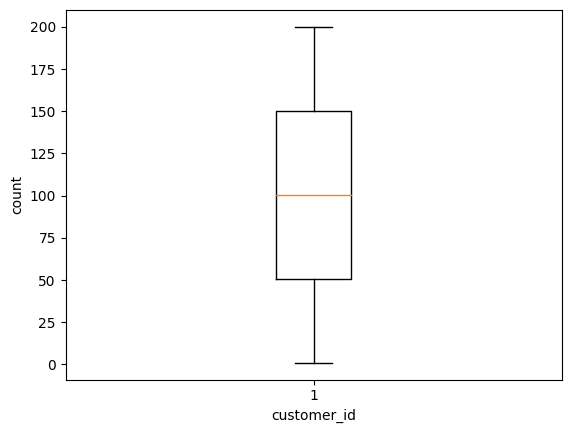

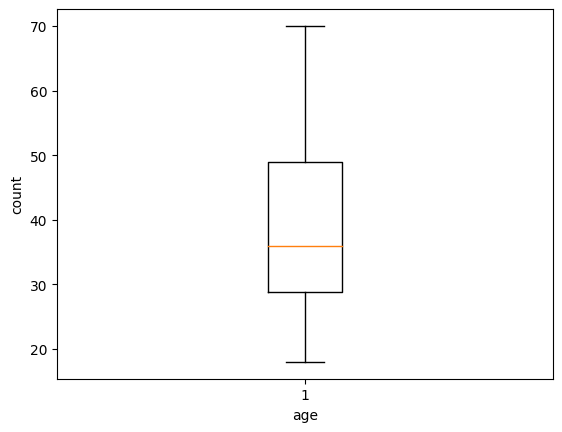

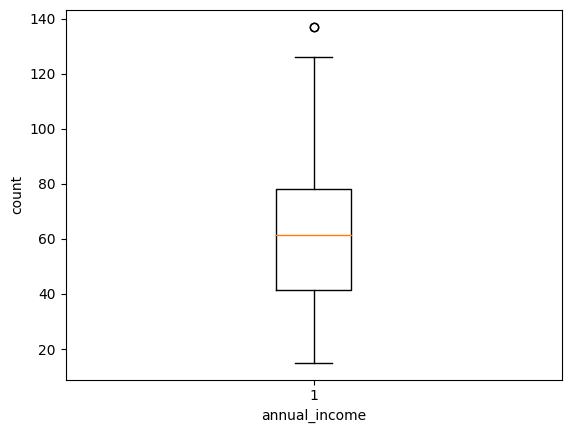

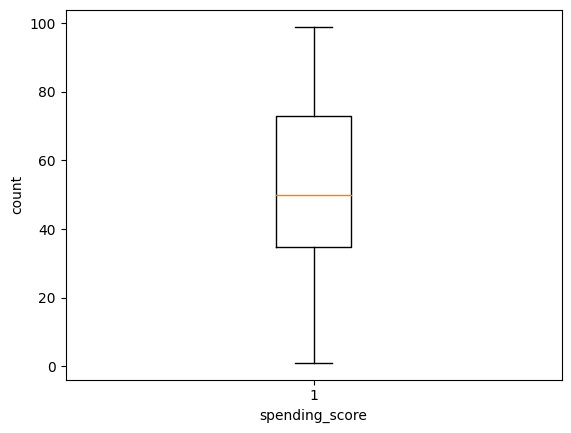

In [43]:
for i in df.columns:
    if df[i].dtypes!="object":
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [ ]:
q1=df["annual_income"].quantile(0.25)
q3=df["annual_income"].quantile(0.75)
iqr=q3-q1
uu=q3+1.5*iqr
ll=q1-1.5*iqr
df=df[(df["annual_income"]<=uu) & (df["annual_income"]>=ll)]

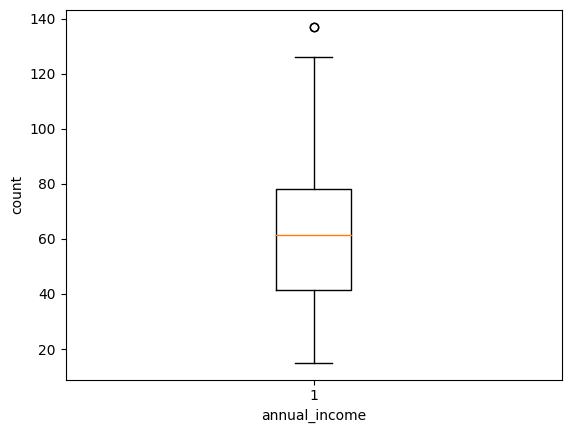

In [44]:
plt.boxplot(df["annual_income"])
plt.xlabel("annual_income")
plt.ylabel("count")
plt.show()

In [54]:
# labelEncoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [57]:
l=LabelEncoder()

In [115]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=l.fit_transform(df[i])

In [116]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [110]:
# visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, ' annual_income vs age')

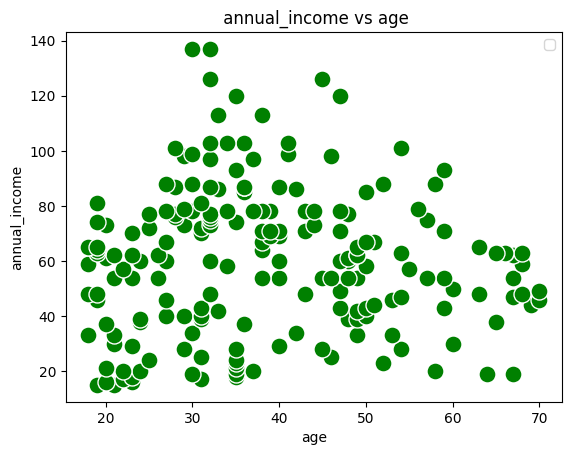

In [160]:
ax=sns.scatterplot(data=df,x=df["age"],y=df["annual_income"],s=150,color="green")
plt.legend()
plt.title(" annual_income vs age")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'annual_income vs spending_score')

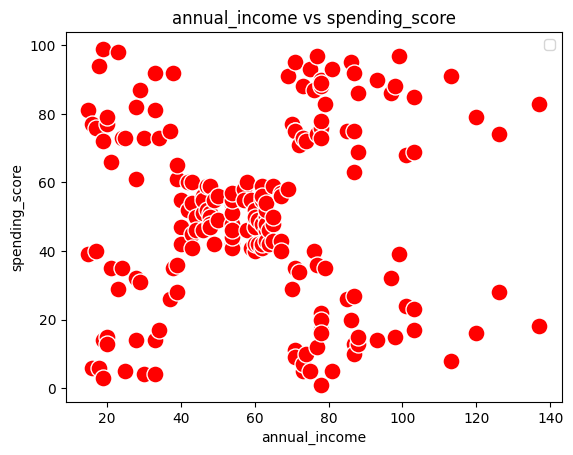

In [158]:
sns.scatterplot(data=df,x=df["annual_income"],y=df["spending_score"],s=150,color="red")
plt.legend()
plt.title("annual_income vs spending_score")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'age vs spending_score')

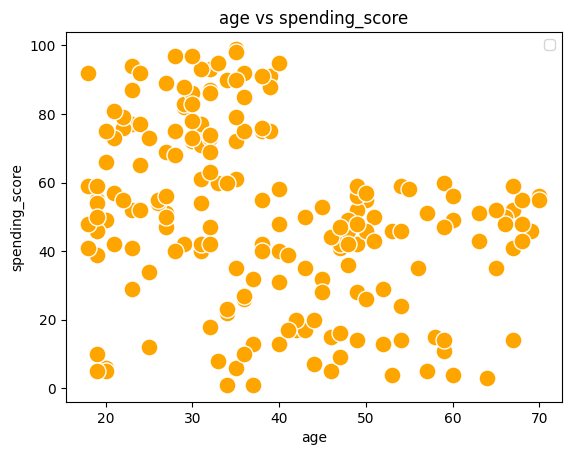

In [159]:
sns.scatterplot(data=df,x=df["age"],y=df["spending_score"],s=150,color="orange")
plt.legend()
plt.title("age vs spending_score")

In [62]:
n_df=df.copy()

In [63]:
n_df

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [64]:
# standardization

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
s=StandardScaler()

In [67]:
s_s=s.fit_transform(n_df)

In [68]:
s_s

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [74]:
df_s=pd.DataFrame(s_s, columns=["customer_id","gender","age","annual_income","spending_score"])

In [75]:
# importing kmean algo

In [80]:
from sklearn.cluster import KMeans
cluster=list(range(2,50))
ssd=[]


In [88]:
for i in cluster:
    cluster_model= KMeans(n_clusters=i,max_iter=150,random_state=56)
    cluster_model.fit(df_s)
    ssd.append(cluster_model.inertia_)

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

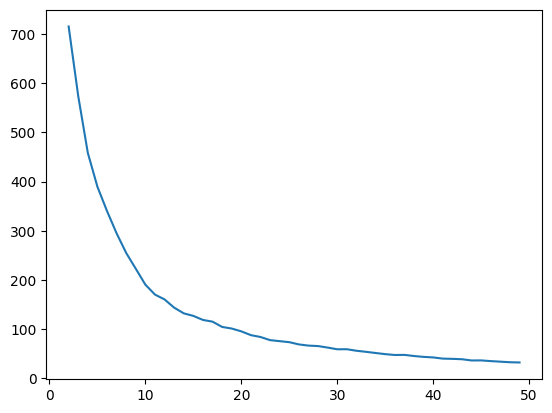

In [162]:
plt.plot(cluster,ssd)

In [93]:
cluster_model= KMeans(n_clusters=10,max_iter=150,random_state=56)
cluster_model.fit(df_s)
    

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=10, random_state=56)

In [94]:
cluster_model.labels_

array([7, 7, 9, 2, 9, 2, 9, 2, 4, 2, 4, 2, 9, 2, 9, 7, 9, 7, 4, 2, 7, 7,
       9, 7, 9, 7, 9, 7, 9, 2, 4, 2, 4, 7, 9, 2, 9, 2, 9, 2, 1, 7, 4, 2,
       9, 2, 1, 3, 3, 3, 1, 7, 3, 4, 1, 4, 1, 4, 3, 4, 4, 7, 1, 1, 4, 7,
       1, 1, 7, 3, 4, 1, 1, 1, 4, 7, 1, 4, 3, 1, 4, 7, 4, 1, 3, 4, 1, 3,
       3, 1, 1, 7, 4, 3, 3, 7, 1, 3, 4, 7, 3, 1, 4, 7, 4, 3, 1, 4, 4, 4,
       4, 3, 3, 7, 3, 3, 1, 1, 1, 1, 0, 3, 3, 0, 3, 6, 5, 0, 5, 0, 5, 0,
       3, 6, 5, 6, 8, 0, 5, 6, 8, 0, 3, 6, 5, 0, 5, 6, 8, 0, 5, 0, 8, 6,
       8, 6, 5, 6, 5, 6, 8, 6, 5, 6, 5, 6, 5, 6, 8, 0, 5, 0, 5, 0, 8, 6,
       5, 0, 5, 0, 8, 6, 5, 6, 8, 0, 8, 0, 8, 6, 8, 6, 5, 6, 8, 6, 8, 0,
       5, 0])

In [102]:
df["customer_id"]=cluster_model.labels_

In [103]:
df.ignore_index=True

In [104]:
df

,customer_id,gender,age,annual_income,spending_score
0,7,1,19,15,39
1,7,1,21,15,81
2,9,0,20,16,6
3,2,0,23,16,77
4,9,0,31,17,40
...,...,...,...,...,...
195,6,0,35,120,79
196,8,0,45,126,28
197,0,1,32,126,74
198,5,1,32,137,18


In [109]:
plt.figure(figsize=(10,9))


<Figure size 1000x900 with 0 Axes>

<Figure size 1000x900 with 0 Axes>